# Protection of personal data of clients

You need to protect the data of the insurance company's customers. To develop such a method of data transformation so that it would be difficult to recover personal information from them. Justify the correctness of his work.

It is necessary to protect the data so that the quality of machine learning models does not deteriorate during conversion. It is not necessary to select the best model.

## Data import and preprocessing

### Import

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:,.2f}".format)

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Data

In [44]:
df = pd.read_csv('insurance.csv')

df.info()
df[:4]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.00,"49,600.00",1,0
1,0,46.00,"38,000.00",1,1
2,0,29.00,"21,000.00",0,0
3,0,21.00,"41,700.00",2,0


### Preprocessing

In [45]:
# Let's bring the columns to the snake register
df = df.rename(
    columns={
    'Пол':'sex', 
    'Возраст':'age', 
    'Зарплата':'salary', 
    'Члены семьи':'family_members', 
    'Страховые выплаты':'insurance_payments'
}
  )

### Pairplot

Let's build a steamplot to make sure once again that we do not have multicollinearity (the correlation matrix is in the profile)

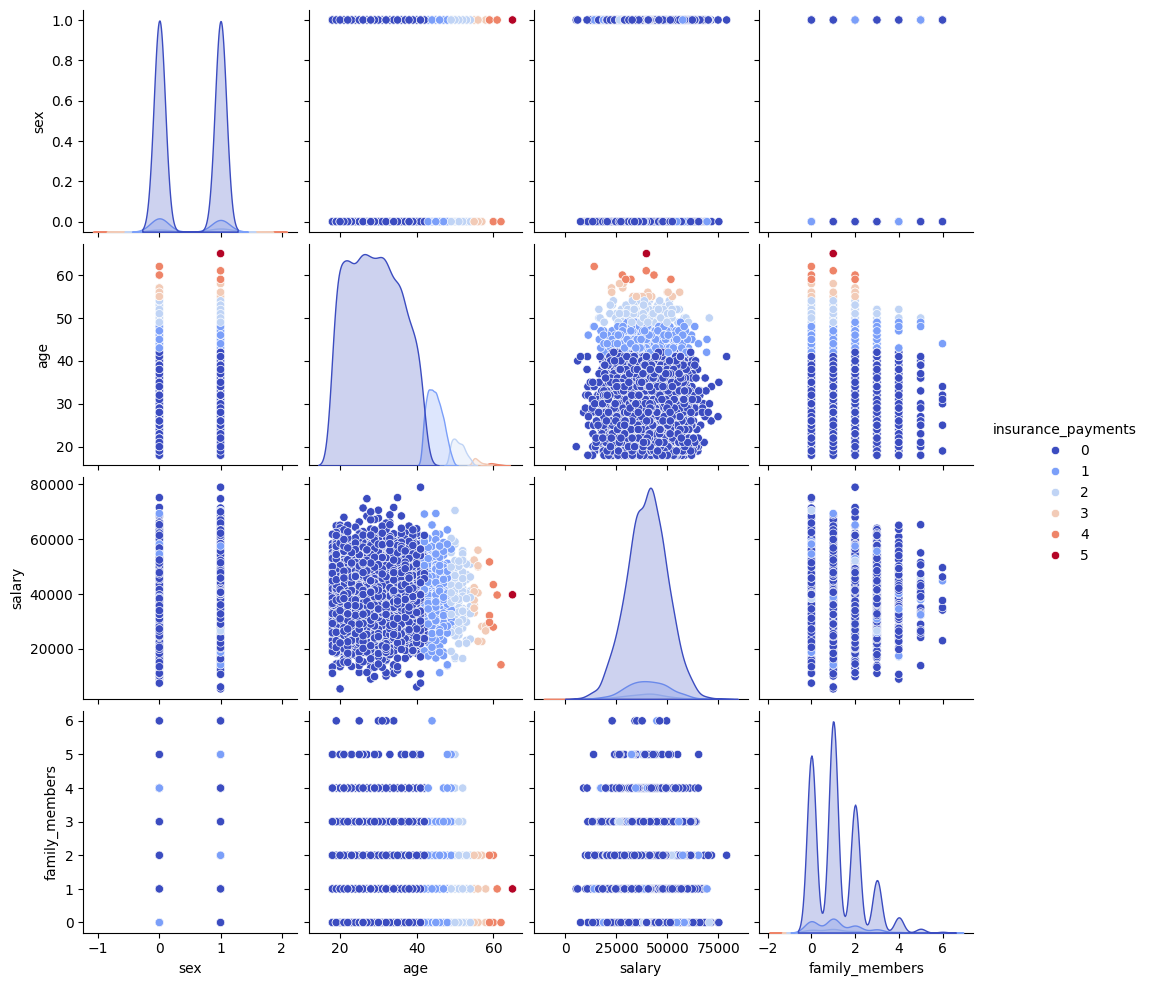

In [46]:
sns.pairplot(df, hue='insurance_payments', palette='coolwarm');

In [47]:
# Consider duplicates throughout the dataset
df.loc[df.duplicated(keep=False)].sort_values(by='salary')[:30]

,sex,age,salary,family_members,insurance_payments
2955,1,32.00,"21,600.00",0,0
2988,1,32.00,"21,600.00",0,0
361,0,50.00,"24,700.00",1,2
2869,0,50.00,"24,700.00",1,2
333,0,32.00,"25,600.00",1,0
4230,0,32.00,"25,600.00",1,0
1378,0,36.00,"26,400.00",0,0
2723,0,36.00,"26,400.00",0,0
1002,1,34.00,"26,900.00",0,0
1140,1,34.00,"26,900.00",0,0


In [48]:
df = df.drop_duplicates().reset_index(drop=True)

<b><span style='color:#16C2D5'>|</span> Conclusions: </b>
<br>

Since the repetitions in our case go according to all parameters, we can safely say that the same person is on the repetitions. You can get rid of such data

The presented dataset almost did not need preprocessing. We renamed only the columns, although we didn't have to, and made sure that duplicates could be deleted. According to pairplot not significant outliers are found. This completes the preprocessing.

<br>

## Matrix multiplication

Predictions:

$$
a = Xw
$$

The task of learning:

$$
w = \arg\min_w MSE(Xw, y)
$$

The learning formula:

$$
w = (X^T X)^{-1} X^T y
$$

### Split the data into training and target samples

In [49]:
features = df.drop('insurance_payments', axis=1)
target = df['insurance_payments']

### Write a recursive function that outputs an invertible 4x4 matrix

In [50]:
def invert():
    s = np.random.normal(size=(4, 4))
    try:
        np.linalg.inv(s)
        return s
    except Exception:
        invert()

### Reproduce the linear regression

In [51]:
class LinearRegression:
    def fit(self, features, target):
        X = np.concatenate((np.ones((len(features), 1)), features), axis=1)
        y = target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features @ self.w + self.w0

### Train the model and find the indicator R2 before the transformation

In [52]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
R2_before = r2_score(target, predictions)
print('The indicator R2 before the conversion is equal to:', R2_before)

The indicator R2 before the conversion is equal to: 0.4302010044852068


### Train the model and find the R2 indicator after the transformation

In [53]:
# Multiply the features by an invertible matrix
new_features = features @ invert()

# Let's repeat the search for the R2 parameter on the new features
model = LinearRegression()
model.fit(new_features, target)
predictions = model.predict(new_features)
R2_after = r2_score(target, predictions)
print('The indicator R2 after conversion is equal to:', R2_after)

The indicator R2 after conversion is equal to: 0.4302010044852037


### The final answer to the task and justification

**Response:** **We checked the quality of the training of the features before and after the transformation (multiplied by the reversible matrix obtained randomly) through the coefficient of determination R2. The quality of the model remained at the same level.**

**Justification:** **We justify the absence of changes in the quality of linear regression after its transformation (multiplication by an invertible matrix), where**
- $a$ — prediction vector

- $a1$ — prediction vector after multiplication by a matrix

- $X$ — feature matrix (the zero column consists of units)

- $X1$ — matrix of features after multiplication (the zero column consists of units)

- $E$ is a unit matrix

- $y$ — vector of the target feature

- $P$ is the matrix by which the signs are multiplied

- $w$ is a vector of linear regression weights (the zero element is equal to the shift)

The prediction vector of linear regression has the form $$a = Xw$$ 

Let's prove that after multiplying by the matrix P, it will not have significant changes $$a1 = a$$

Formula X1:
$$ X1 = X P $$  

Weight Formula: 
$$ w = (X^T X)^{-1} X^T y $$
Substitute X1 into the weight formula after multiplication and perform the transformations:
$$ w1 = ((XP)^T XP)^{-1} (XP)^T y  => $$
$$ w1 = (P^T (X^T X) P)^{-1} P^T X^T y => $$
$$ w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y => $$
$$ w1 = P^{-1} ((X^T X)^{-1}) E X^T y $$
$$ w1 = P^{-1} w $$

Substitute w1 into the formula of the linear regression prediction vector after multiplication and perform the transformations:

$$ a1 = X1 w1 $$
$$ a1 = X P P^{-1} w $$
$$ a1 = X w $$
Thus, we can conclude that $$a=a1$$

**Which was required to be proved**

## The conversion algorithm

### To propose a variant of data transformations for the task and justify why the quality of predictions will not change

*You can perform conversions using the StandartScaler or MinMaxScaler methods*

*As an example, consider StandartScaler*

In [54]:
# Let's create a copy of our feature before converting
features_scaler = features.copy()

# Let's create a list from the columns of our features
numeric = list(features.columns)

# Let's perform the transformations using the StandartScaler method
scaler = StandardScaler()
scaler.fit(features_scaler[numeric])
features_scaler[numeric] = scaler.transform(features_scaler[numeric])

In [55]:
# Let's train the model after the transformation
model = LinearRegression()
model.fit(features_scaler, target)
predictions = model.predict(features_scaler)
R2_scaler = r2_score(target, predictions)
print('The indicator R2 for the Standard Scale r method is equal to:', R2_scaler)

The indicator R2 for the Standard Scale r method is equal to: 0.4302010044852068


The Standard Scaler formula has the form $$z = (x - u) / s$$

Where
- $x$ is a variable attribute

- $u$ is the average value of this attribute

- $s$ — standard deviation

### Create a function that will reproduce the StandartScaler

In [56]:
def standart_scaler(X):
    u = np.mean(X)
    s = np.std(X)
    new = []
    for i in range(len(X)):  
        vector=[]
        for j in range(len(X.columns)):  
            vector.append(
                (np.array(X)[i,j] - u[j]) / s[j])
        new.append(np.nan_to_num(vector))
    new = np.array(new)
    return new

In [57]:
# get preprocessed frame 
features_scaler_new = standart_scaler(features)

# Let's train the model after the transformation
model = LinearRegression()
model.fit(features_scaler_new, target)
predictions = model.predict(features_scaler_new)
R2_scaler_new = r2_score(target, predictions)
print('The R2 indicator for the StandartScaler method is:', R2_scaler_new)

The R2 indicator for the StandartScaler method is: 0.4302010044852068


### Compare the arrays after the regular StandartScaler and after our manual one in the form of a function

In [58]:
# Our created StandartScaler from the function
features_scaler_new

array([[ 1.0030995 ,  1.1754362 ,  0.97315092, -0.18517565],
       [-0.99691008,  1.76456423, -0.19011493, -0.18517565],
       [-0.99691008, -0.23847105, -1.89490109, -1.09546611],
       ...,
       [-0.99691008, -1.29890149, -0.60126924,  0.7251148 ],
       [ 1.0030995 , -1.06325028, -0.72160708,  1.63540526],
       [ 1.0030995 , -0.35629665,  0.07061707, -0.18517565]])

In [59]:
# Regular StandartScaler
np.array(features_scaler)

array([[ 1.0030995 ,  1.1754362 ,  0.97315092, -0.18517565],
       [-0.99691008,  1.76456423, -0.19011493, -0.18517565],
       [-0.99691008, -0.23847105, -1.89490109, -1.09546611],
       ...,
       [-0.99691008, -1.29890149, -0.60126924,  0.7251148 ],
       [ 1.0030995 , -1.06325028, -0.72160708,  1.63540526],
       [ 1.0030995 , -0.35629665,  0.07061707, -0.18517565]])

*As we can see, they are identical*

## Check algorithm

### Compare the R2 values before multiplying by the reversible matrix and after

In [60]:
R2_before < R2_after

False

### Compare the R2 indicators before the StandardScaler conversion and after

*UPD: comparing R2 indicators between the standard StandartScaler and the StandartScaler from the manual function does not make sense, since we have already made sure that the arrays are completely identical, and therefore all other indicators will be identical. So for comparison, you can take any of them*

In [61]:
R2_before == R2_scaler_new

True

**In both cases, the indicators are equal**

## Conclusion

**We have uploaded the dataset and preprocessed the data. Next, we conducted research to answer the question "will the quality of linear regression change when multiplied by an invertible matrix?". First, we did this experimentally and saw that the coefficient of determination remained at the same level in the indicator. Next, we justified our conclusion by converting formulas, which gave us an accurate answer that the quality of regression will remain at the same level. After that, two ways of converting features without loss of prediction quality were proposed. These are the StandartScaler or MinMaxScaler methods. We conducted the research work on StandartScaler. We have changed the features in a standard way and through a function (so that we can compare and make sure that we did not make a mistake in the formula) after that, the resulting array was trained again and the R2 metric was pulled out. It also did not affect the quality of the regression. Thus, with the help of transformations, we do not lose quality, but at the same time, if our data falls into the wrong hands, they will turn out to be useless, therefore we can say that they are sufficiently protected.**